In [1]:
import tweepy
import json
import pandas as pd

from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)

In [243]:
# Get UPI tweet ids (this is the id of the tweet)

UPI_tweets = []
for tweet in tweepy.Cursor(api.user_timeline,
                           id = 'UPI').items(100):
    
    # Add the tweet id to UPI_tweets list
    UPI_tweets.append(tweet.id)


In [244]:
# Get list of usernames who retweeted UPI tweets

UPI_retweeters = []

for tweet_id in UPI_tweets:    
    retweets_list = api.retweets(tweet_id)
    
    # Add the retweeter's username to UPI_retweeters list
    for retweet in retweets_list:
        UPI_retweeters.append(retweet.user.screen_name)
        
 # Write UPI retweeter list to a json file
    
with open ('UPI_retweeters.json', 'w') as f:
    json.dump(UPI_retweeters, f)
    
print('Finished!')
   

Rate limit reached. Sleeping for: 875


In [245]:
 # Write UPI retweeter list to a json file
    
with open ('UPI_retweeters.json', 'w') as f:
    json.dump(UPI_retweeters, f)

In [246]:
# Create file for list of tweets that UPI retweeters have retweeted 
file_name = 'UPI_retweeter_timeline_RT.json'

# set counter for number of tweets and usernames read
tweets_read = 0
screen_names_read = 0

# Open json file to write results
with open(file_name, 'w') as f_out:
    
    # Gather 10 tweets from UPI retweeter timelienes
    for UPI_retweeter in UPI_retweeters:
        try:
            search = api.user_timeline(id = UPI_retweeter,
                                      count = 10)
        except tweepy.TweepError:
            pass
        else:
            # Parse through the ten tweets
            for result in search:
                tweet = result._json
                
                # Check to see if the tweet is a retweet
                if tweet.get('retweeted_status'):
                    
                    # If yes, write tweet to json file
                    json.dump(tweet, f_out)
                    f_out.write('\n')
                    
                    # Count the retweets
                    tweets_read += 1
                    
            # Count the usernames        
            screen_names_read += 1
            
            if screen_names_read % 25 == 0:
                print ('Users read:\t%d/%d\tRetweets read:\t%d' % (screen_names_read, len(UPI_retweeters), tweets_read))

print ('Users read:\t%d/%d\tRetweets read:\t%d\tFinished!' % (screen_names_read, len(UPI_retweeters), tweets_read))
                

Users read:	25/208	Retweets read:	214
Users read:	50/208	Retweets read:	396
Users read:	75/208	Retweets read:	582
Users read:	100/208	Retweets read:	764
Users read:	125/208	Retweets read:	986
Users read:	150/208	Retweets read:	1202
Users read:	175/208	Retweets read:	1379
Users read:	200/208	Retweets read:	1505
Users read:	208/208	Retweets read:	1568	Finished!


In [247]:
# Read json into a pandas dataframe
# This has created a data frame that has the original tweets that were retweeted by UPI retweeters

UPI_retweeter_RT_df = pd.read_json('UPI_retweeter_timeline_RT.json', lines = True)

In [248]:
# Add column of UPI retweeters screen name
UPI_retweeter_RT_df['retweeter'] = 0
for ii in range (len(UPI_retweeter_RT_df)):
    UPI_retweeter_RT_df.loc[ii, 'retweeter'] = UPI_retweeter_RT_df.loc[ii, 'user']['screen_name']
    UPI_retweeter_RT_df.loc[ii, 'retweeted_user'] = UPI_retweeter_RT_df.loc[ii, 'retweeted_status']['user']['screen_name']
  

In [249]:
# Create new dataframe with only the important columns

UPI_edge_list_first_level = UPI_retweeter_RT_df[['retweeter', 'retweeted_user']]

In [250]:
UPI_edge_list_first_level['retweeted_user'].value_counts()

Reuters           103
UPI                51
AJEnglish          30
SizweLo            24
AP                 20
                 ... 
amuse               1
Chris_1791          1
doolsetbangtan      1
ei_wynn             1
Park_Youngsun       1
Name: retweeted_user, Length: 778, dtype: int64

In [253]:
# Create file for list of tweets that UPI retweeters have retweeted 
file_name = 'RTs_of_users_retweeted_by_UPI_retweeters.json'

# set counter for number of tweets and usernames read
tweets_read = 0
screen_names_read = 0

# Open json file to write results
with open(file_name, 'w') as f_out:
    
    # Gather 10 tweets from UPI retweeter timelienes
    for user in users_retweeted_by_UPI_retweeters:
        try:
            search = api.user_timeline(id = user,
                                      count = 10)
        except tweepy.TweepError:
            pass
        else:
            # Parse through the ten tweets
            for result in search:
                tweet = result._json
                
                # Check to see if the tweet is a retweet
                if tweet.get('retweeted_status'):
                    
                    # If yes, write tweet to json file
                    json.dump(tweet, f_out)
                    f_out.write('\n')
                    
                    # Count the retweets
                    tweets_read += 1
                    #if tweets_read % 25 == 0:
                        
                        #print ('Users read:\t%d/%d\tRetweets read:\t%d' % (screen_names_read, len(users_retweeted_by_UPI_retweeters), tweets_read))
                    
            # Count the usernames        
            screen_names_read += 1
            
            if screen_names_read % 25 == 0:
                print ('Users read:\t%d/%d\tRetweets read:\t%d' % (screen_names_read, len(users_retweeted_by_UPI_retweeters), tweets_read))

print ('Users read:\t%d/%d\tRetweets read:\t%d\tFinished!' % (screen_names_read, len(users_retweeted_by_UPI_retweeters), tweets_read))

Users read:	25/778	Retweets read:	55
Users read:	50/778	Retweets read:	109
Users read:	75/778	Retweets read:	141
Users read:	100/778	Retweets read:	186
Users read:	125/778	Retweets read:	242
Users read:	150/778	Retweets read:	290
Users read:	175/778	Retweets read:	336
Users read:	200/778	Retweets read:	393
Users read:	225/778	Retweets read:	452
Users read:	250/778	Retweets read:	485
Users read:	275/778	Retweets read:	547
Users read:	300/778	Retweets read:	602
Users read:	325/778	Retweets read:	633
Users read:	350/778	Retweets read:	677
Users read:	375/778	Retweets read:	724
Users read:	400/778	Retweets read:	787
Users read:	425/778	Retweets read:	851
Users read:	450/778	Retweets read:	919
Users read:	475/778	Retweets read:	1000
Users read:	500/778	Retweets read:	1086
Users read:	525/778	Retweets read:	1157
Users read:	550/778	Retweets read:	1229
Users read:	575/778	Retweets read:	1312
Users read:	600/778	Retweets read:	1372
Users read:	625/778	Retweets read:	1432
Users read:	650/778	Re

Rate limit reached. Sleeping for: 482


Users read:	700/778	Retweets read:	1638
Users read:	725/778	Retweets read:	1677
Users read:	750/778	Retweets read:	1709
Users read:	775/778	Retweets read:	1779
Users read:	778/778	Retweets read:	1789	Finished!


In [254]:
# Read json into a pandas dataframe

# This has created a data frame that has the original tweets that were retweeted by users retweeted by UPI retweeters

users_retweeted_by_UPI_retweeters_RT_df = pd.read_json('RTs_of_users_retweeted_by_UPI_retweeters.json', lines = True)

In [290]:
# Add column of screen names of users retweeted by UPI retweeters 
users_retweeted_by_UPI_retweeters_RT_df['retweeter'] = 0
for ii in range (len(users_retweeted_by_UPI_retweeters_RT_df)):
    users_retweeted_by_UPI_retweeters_RT_df.loc[ii, 'retweeter'] = users_retweeted_by_UPI_retweeters_RT_df.loc[ii, 'user']['screen_name']
    users_retweeted_by_UPI_retweeters_RT_df.loc[ii, 'retweeted_user'] = users_retweeted_by_UPI_retweeters_RT_df.loc[ii, 'retweeted_status']['user']['screen_name']
  

In [291]:
# Create new dataframe with only the edge list

UPI_edge_list_second_level = users_retweeted_by_UPI_retweeters_RT_df[['retweeter', 'retweeted_user']]

In [292]:
UPI_edge_list_second_level['retweeted_user'].value_counts()

BTS_twt            31
chartdata          17
bts_bighit         14
AP                 10
joncoopertweets     9
                   ..
StateDeptSpox       1
KeishaBlain         1
UrbanGi64           1
TheWestWingThi1     1
mupper2             1
Name: retweeted_user, Length: 1382, dtype: int64

In [258]:
# Create one dataframe with entire edge list 

# List dataframes to be combined
dfs = [UPI_edge_list_first_level, UPI_edge_list_second_level]

UPI_edge_list = pd.concat(dfs)

In [259]:
UPI_edge_list.to_csv('UPI_edge_list.csv', index = False)

In [260]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

In [264]:
UPI_data = open('UPI_edge_list.csv', 'r')
next(UPI_data, None)
Graphtype = nx.Graph()

G = nx.parse_edgelist(UPI_data, 
                      delimiter=',',
                      create_using = nx.DiGraph(),
                      nodetype = str,
                     data=(('weight', float),))

In [265]:
G = nx.from_pandas_edgelist(UPI_edge_list, 
                            source = 'retweeter',
                            target = 'retweeted_user',
                            create_using = nx.MultiDiGraph())


In [337]:
# Create a dictionary with the nodes with an in-degree higher than 10
important_nodes = {}

for (username, count) in degree.items():
    if count > 25:
        important_nodes[username] = count

In [338]:
important_nodes

{'UPI': 51, 'AP': 30, 'Reuters': 105, 'AJEnglish': 35, 'BTS_twt': 38}

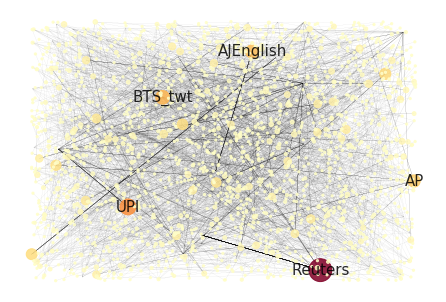

In [341]:
# Set node size based on in-degree
degree = dict(G.in_degree())

# Create a color map based on in-degree values
low, *_, high = sorted(degree.values())
norm = mpl.colors.Normalize(vmin = low, vmax = high, clip = True)
mapper = mpl.cm.ScalarMappable(norm = norm, cmap = mpl.cm.YlOrRd)

# Create dictionary to be used as labels
labels = {}
for node in G.nodes():
    if node in important_nodes:
        labels[node] = node
        

nx.draw_random(G, 
        create_using = nx.MultiDiGraph(),
        node_size =[v*5 for v in degree.values()], 
        labels = labels,
        arrows = False,
        node_color = [mapper.to_rgba(i)
                      for i in degree.values()],
        width = .03,
        alpha = .85,
        font_color = 'black',
        font_size = 15)

plt.show()


In [293]:
nx.info(G)

'Name: \nType: MultiDiGraph\nNumber of nodes: 2105\nNumber of edges: 3357\nAverage in degree:   1.5948\nAverage out degree:   1.5948'